In [8]:
import pandas as pd
import numpy as np
import config
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.decomposition import FactorAnalysis, PCA
from pipeline.training.data_manager import _X_feature_selector, _y_feature_selector
import matplotlib.pyplot as plt

data = pd.read_csv(f'{config.TRAINING_DATA_PATH}/dataset.csv')

In [9]:
X = data[_X_feature_selector(data)]
y = data[_y_feature_selector()]

X.drop(columns=['nc_red', 'nc_blue', 'nc_direct_difference'], inplace=True)

/tmp/ipykernel_82390/3411146690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['nc_red', 'nc_blue', 'nc_direct_difference'], inplace=True)


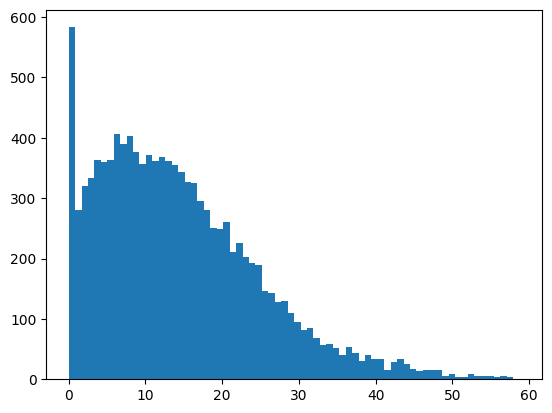

In [16]:
plt.hist(X['ctrl_per_min_mean_red'][~X['ctrl_per_min_mean_red'].isna()], bins=70)
plt.show()

In [4]:
# imp = IterativeImputer(max_iter=10, random_state=77)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X = imp.fit_transform(X)

In [6]:
""" Do principal component analysis on the dataset """
pca = PCA(n_components=10)
transformed_data = pca.fit_transform(imputed_X)
print (pca.get_feature_names_out)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# transformed_data.head()

AttributeError: 'PCA' object has no attribute 'feature_names_in_'